In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import time
import itertools
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import seaborn as sns
import scipy.stats as stats
from scipy.stats import gamma
from scipy.stats import ortho_group

In [2]:
def plot_results(output, variable, labels, xlabel = None, ylabel = 'Power',  xticks = None, yticks = [0,0.5,1], legend = False,  ax=None, title =None):
    # Use LaTeX and set font size
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('font', size=22)
    plt.rc('legend', fontsize=22)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    if ax is None:
            fig, ax = plt.subplots()

    # Define markers
    markers = [ 's', 'D', 'o', 'v','^', '*', 'P', 'X']
    zorder = [len(labels) - i for i in range(len(labels))]
    default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    linestyle = ['-']*6 + [':']*7
    default_colors[5] = 'tab:cyan'
    for i in range(len(labels)):
        if output[i] is None:
            continue
        else:
            ax.plot(variable, output[i], label= str(labels[i]), 
                 marker=markers[i % len(markers)], linewidth=2, color = default_colors[i % len(default_colors)], linestyle = linestyle[i % len(linestyle)], zorder = zorder[i])

    ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Set y-ticks
    if yticks is not None:
        ax.set_yticks(yticks)
    else:
        ax.set_yticks([0,0.5,1], ['', '', ''])


    # Set x-ticks
    if xticks is not None:
        ax.set_xticks(xticks)
        ax.set_xticklabels([f'{x:.1f}' for x in xticks])
        
    else:
        ax.set_xticks(variable)

    # Legend outside
    if legend:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_ylim(0,1)

    # Return the axes object
    return ax

def load_results(file):
    results = []
    for i in range(1,101):
        fname = file + str(i) + '.npz'
        resulti = np.load(fname)
        resulti = np.array([resulti[key] for key in resulti.files])
        results.append(resulti)
    results = np.array(results)
    # squeeze the last dimension
    results = np.squeeze(results)
    return results

(100, 9, 4)
(9, 4)


<Axes: title={'center': 'Sinusoid'}, xlabel='Sample size', ylabel='Power'>

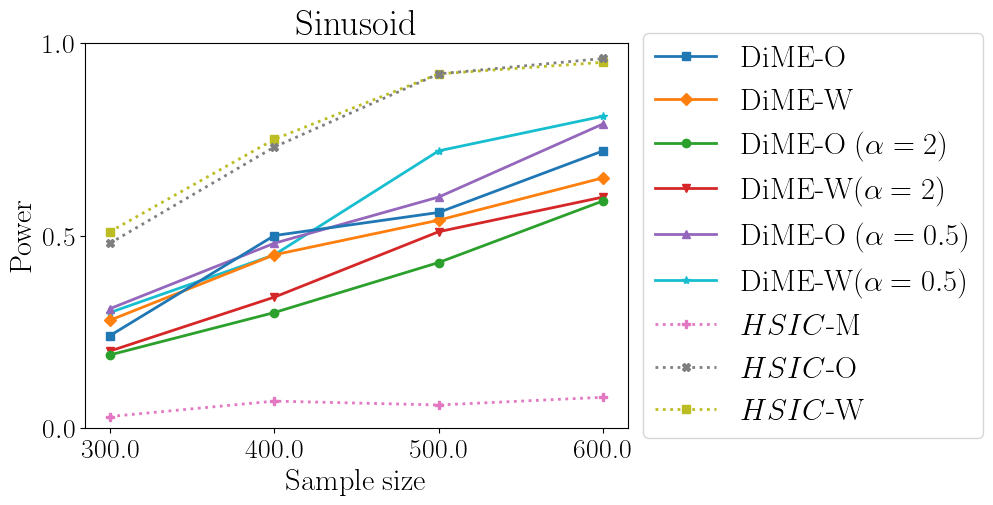

In [13]:
# load results
results = load_results('results/sinusoid') # sinusoid_ep500_
print(results.shape)
output = np.mean(results, axis=0)
print(output.shape)
labels = [r'DiME-O', r'DiME-W', r'DiME-O  ($\alpha = 2$)',r'DiME-W($\alpha = 2$)',r'DiME-O  ($\alpha = 0.5$)',r'DiME-W($\alpha = 0.5$)',r'$HSIC$-M',r'$HSIC$-O', r'$HSIC$-W']
sample_sizes = (300, 400,500,600)

# plot results
fig, ax = plt.subplots(1,1, figsize=(7, 5))
plot_results(output, sample_sizes, labels, xlabel='Sample size', ylabel='Power', xticks=sample_sizes, ax=ax, title='Sinusoid', legend = True)

(100, 9, 4)
(9, 4)


<Axes: title={'center': 'Sine Dependency'}, xlabel='Sample size', ylabel='Power'>

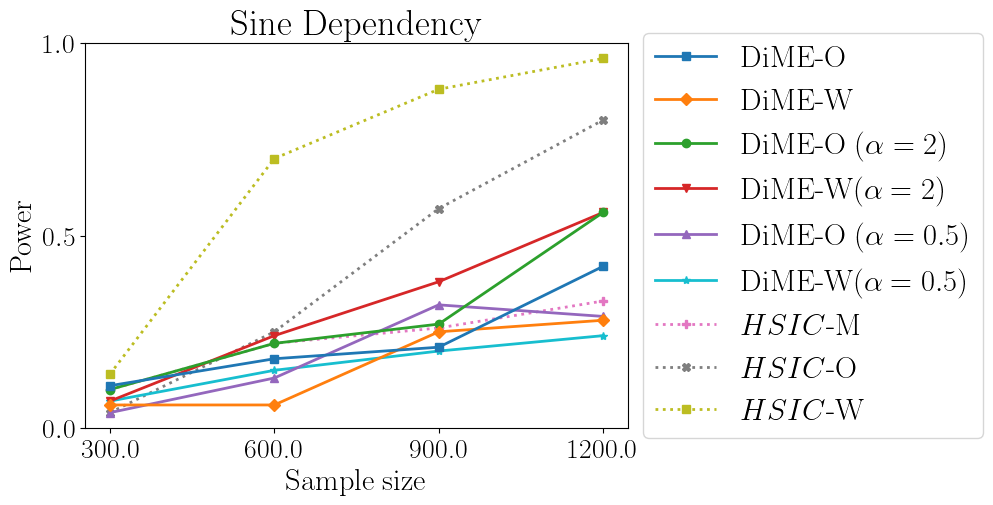

In [10]:
# load results
results = load_results('results/sine_dependence') # _ep500_
print(results.shape)
output = np.mean(results, axis=0)
print(output.shape)
sample_sizes = (300, 600,900,1200)

# plot results
fig, ax = plt.subplots(1,1, figsize=(7, 5))
plot_results(output, sample_sizes, labels, xlabel='Sample size', ylabel='Power', xticks=sample_sizes, ax=ax, title='Sine Dependency', legend = True)

(100, 9, 4)
(9, 4)


<Axes: title={'center': 'Gaussian Sign'}, xlabel='Sample size', ylabel='Power'>

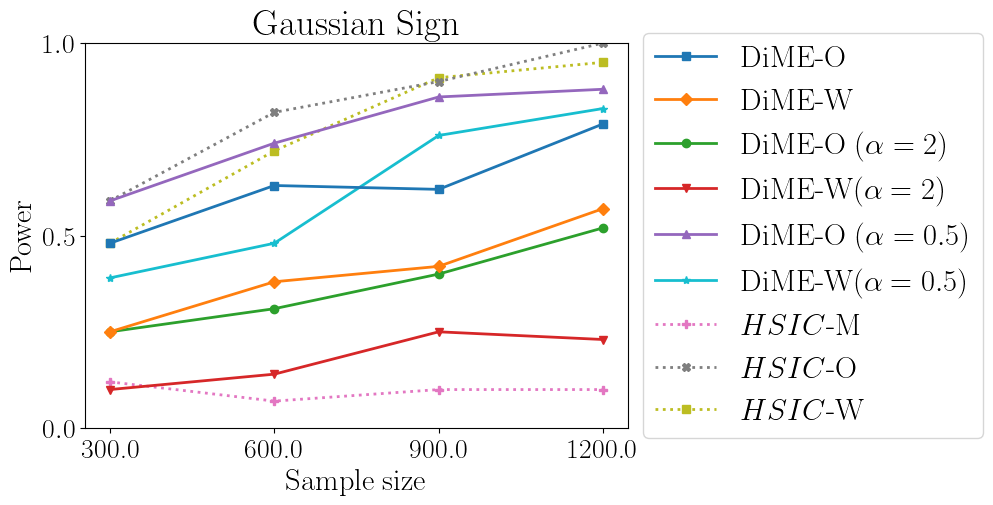

In [11]:
# load results
results = load_results('results/gaussian_sign') # _ep500_
print(results.shape)
output = np.mean(results, axis=0)
print(output.shape)
sample_sizes = (300, 600,900,1200)

# plot results
fig, ax = plt.subplots(1,1, figsize=(7, 5))
plot_results(output, sample_sizes, labels, xlabel='Sample size', ylabel='Power', xticks=sample_sizes, ax=ax, title='Gaussian Sign', legend = True)

(100, 9, 10)
(9, 10)


<Axes: title={'center': 'Independent subspaces'}, xlabel='Angle$\\times \\pi/4$', ylabel='Power'>

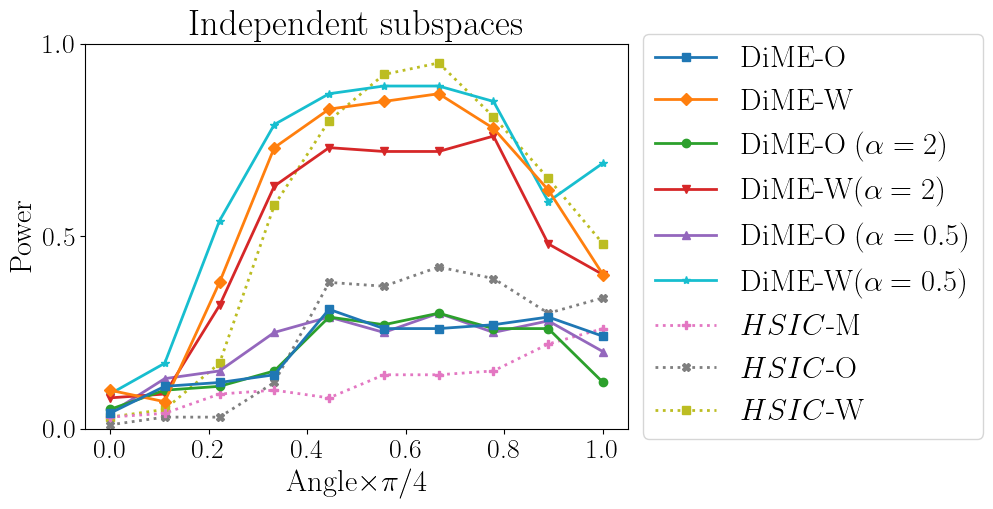

In [6]:
# load results
results = load_results('results/isa')
print(results.shape)
output = np.mean(results, axis=0)
print(output.shape)
alphas = np.linspace(0,1,10)
xticks = np.linspace(0,1,6)

# plot results
fig, ax = plt.subplots(1,1, figsize=(7, 5))
plot_results(output, alphas, labels, xlabel=r'Angle$\times \pi/4$', ylabel='Power', xticks=xticks, ax=ax, title='Independent subspaces', legend = True)